#### Group M5

#### Import Packages

In [1]:
import altair as alt
import pandas as pd
from vega_datasets import data

#### Main Visualization

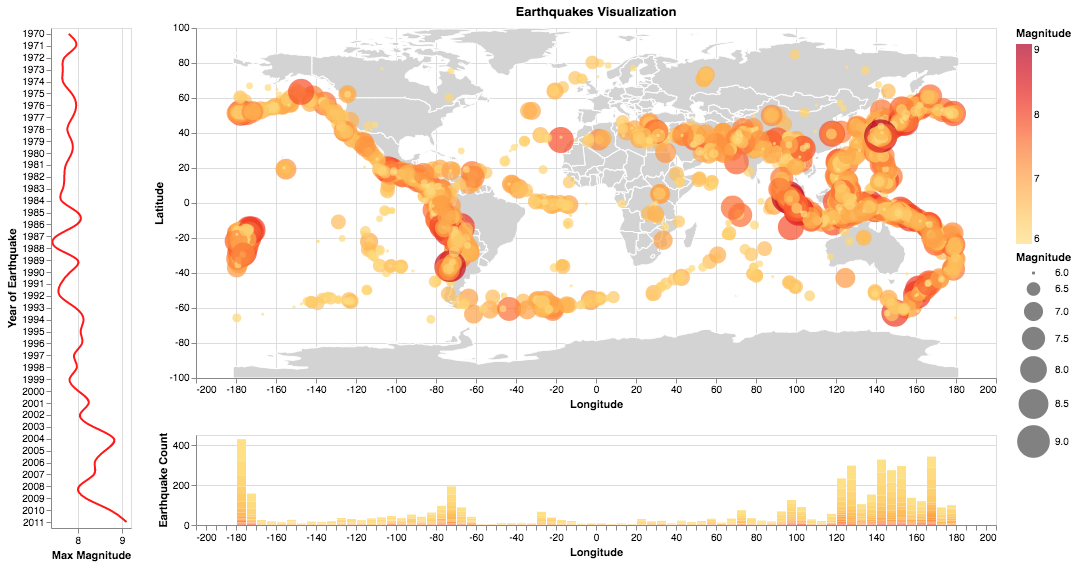

In [2]:
alt.renderers.enable('notebook') #enable

eqData = pd.read_csv('earthquakes1970-2014.csv',nrows=5000)
earth = alt.topo_feature(data.world_110m.url, 'countries')
slider = alt.binding_range(min=1900, max=2000, step=10)

### Extract Year,Month,Day,Hour ###
eqData['Year'] = pd.to_datetime(eqData['DateTime']).dt.year
eqData['Month'] = pd.to_datetime(eqData['DateTime']).dt.month
eqData['Day'] = pd.to_datetime(eqData['DateTime']).dt.day
eqData['Hour'] = pd.to_datetime(eqData['DateTime']).dt.hour

select_year = alt.selection_single(name="Year", fields=['Year'],bind=slider)
brush = alt.selection_interval(encodings=['y'])

######## Globe Background ########
background = alt.Chart(earth).mark_geoshape(
    fill='lightgrey',
    stroke='white',
).properties(
    width=800,
    height=350,
).project('equirectangular')


######## Marks ########
points =  alt.Chart(eqData,title='Earthquakes Visualization').mark_circle(opacity=0.7).encode(
    x = alt.X('Longitude:Q',),
    y = alt.Y('Latitude:Q',scale=alt.Scale(domain=(-100,100),)),
    color = alt.Color('Magnitude:Q',  legend=alt.Legend(title='Magnitude')),
    size = alt.Size('Magnitude:Q',legend=alt.Legend(title='Magnitude'),scale=alt.Scale(type ='linear',domain = [6,7,8,9],),), 
    tooltip=['Magnitude', 'Depth', 'DateTime']
).transform_filter(brush)

maxM = max(eqData['Magnitude'])

#######  Bottom Histogram - Earhtquakes over time ########
timeHistogram = alt.Chart(eqData,width=80,height=500).mark_line(opacity=0.9,interpolate='basis').encode(
    x = alt.X('max(Magnitude):Q',title='Max Magnitude',scale=alt.Scale(domain=[7.5,maxM]),),
    y = alt.Y('Year:N',title='Year of Earthquake',),
    color = alt.Color(value='red'),
).add_selection(brush)

### Count of earthquakes
frequency = alt.Chart(eqData,height=90,width=800).mark_bar(interpolate='basis',clip=True).encode(
    x = alt.X('Longitude:Q',title='Longitude', bin=alt.Bin(extent=[-200, 200], step=5)),
    y = alt.Y('count()',title='Earthquake Count',),
    color = alt.Color('Magnitude:Q',scale=alt.Scale(scheme='yelloworangered')),
).transform_filter(brush)


### Depth Barchart ###
meanDepth = alt.Chart(eqData).mark_line(color='blue',interpolate='basis',opacity=0.5).encode(
    x='Year:N',
    y=alt.Y('mean(Depth):Q',title='Depth')
)

####### Display #######
timeHistogram  | (background + points) &  frequency


#### Alternitive Designs

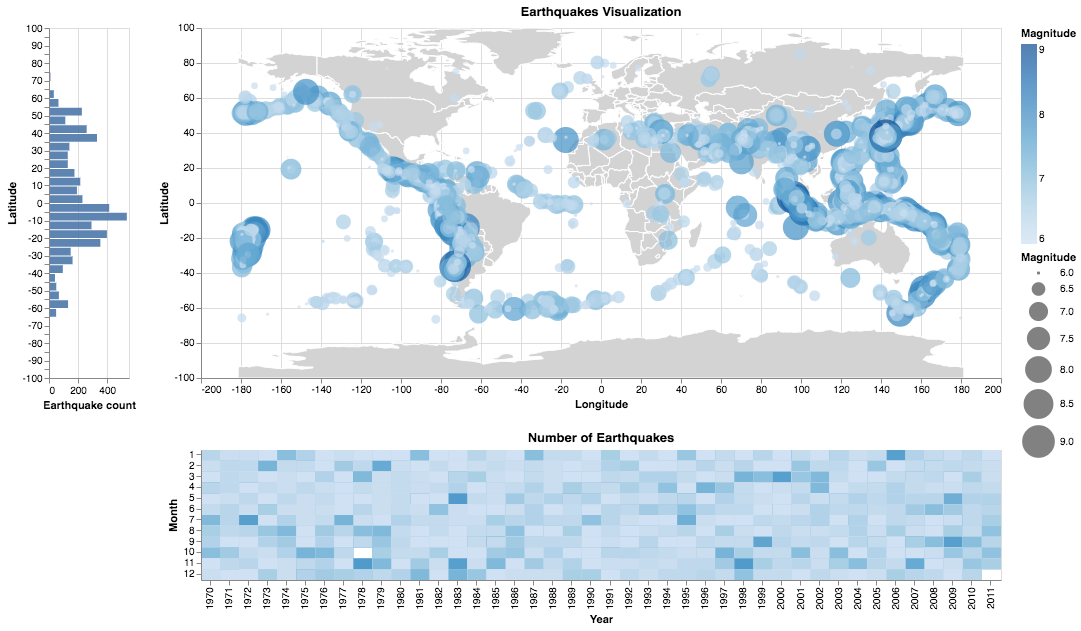

In [3]:
select_year = alt.selection_single(name="Year", fields=['Year'],bind=slider)
brush = alt.selection_interval(encodings=['x'])

######## Globe Background ########
background = alt.Chart(earth).mark_geoshape(
    fill='lightgrey',
    stroke='white',
).properties(
    width=800,
    height=350,
).project('equirectangular')


######## Marks ########
points =  alt.Chart(eqData,title='Earthquakes Visualization').mark_circle(opacity=0.7).encode(
    x = alt.X('Longitude:Q',),
    y = alt.Y('Latitude:Q',scale=alt.Scale(domain=(-100,100),)),
    color = alt.Color('Magnitude:Q',  legend=alt.Legend(title='Magnitude')),
    size = alt.Size('Magnitude:Q',legend=alt.Legend(title='Magnitude'),scale=alt.Scale(type ='linear',domain = [6,7,8,9],)), 
    tooltip=['Magnitude', 'Depth', 'DateTime'],
).transform_filter(brush)

heat = alt.Chart(eqData,title='Number of Earthquakes',width=800,height=130).mark_rect().encode(
    x=alt.X('Year:O',),
    y=alt.Y('Month:O'),
    color = alt.Color('Magnitude:Q',scale=alt.Scale(scheme='blues',)),
).add_selection(brush)

latitude = alt.Chart(eqData,width=80,height=350).mark_bar(opacity=0.9,interpolate='basis',clip=True).encode(
    x = alt.X('count()',title='Earthquake count',),
    y = alt.Y('Latitude:Q',title='Latitude',bin=alt.Bin(extent=[-100, 100], step=5),stack=False),
    #color = alt.Color('Magnitude:Q',scale=alt.Scale(scheme='blues',)),
).transform_filter(brush)


latitude | (background + points) & heat

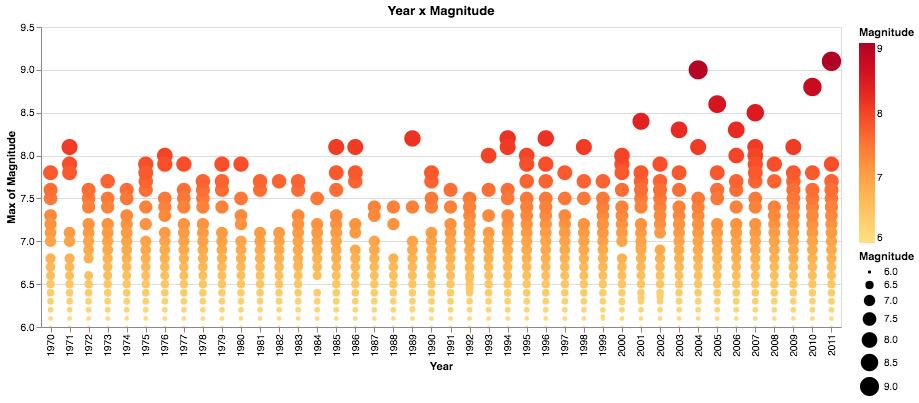

In [4]:
#### Time Series  ####
eaData = pd.read_csv('earthquakes1970-2014.csv',nrows=5000)
eaData['Year'] = pd.to_datetime(eaData['DateTime']).dt.year
eaData['Month'] = pd.to_datetime(eaData['DateTime']).dt.month
eaData['Hour'] = pd.to_datetime(eaData['DateTime']).dt.hour

### Year and Magnitude Barchart ###
chart =  alt.Chart(eaData,title='Year x Magnitude',height=300,width=800).mark_circle().encode(
    x = alt.X('Year:N',),
    y = alt.Y('max(Magnitude):Q',scale=alt.Scale(domain=(6,9.5),)),#bin=alt.Bin(extent=[-200, 200], step=1)
    color = alt.Color('Magnitude:Q',scale=alt.Scale(scheme='yelloworangered',)),
    size = alt.Size('Magnitude:Q',scale=alt.Scale(domain=[6,9])),
)
chart

In [5]:
eaData.describe()

Latitude    Longitude        Depth    Magnitude   NbStations  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.512410    44.698591    73.825468     6.367316   295.833000   
std      29.771446   124.877607   128.206224     0.415825   166.773622   
min     -66.448000  -179.989000     0.000000     6.000000     0.000000   
25%     -17.756250   -73.416750    15.000000     6.100000   159.000000   
50%      -3.522000   118.394500    33.000000     6.200000   283.000000   
75%      28.019250   146.755000    52.000000     6.500000   415.000000   
max      84.948000   179.998000   688.000000     9.100000   929.000000   

              Gap   Distance          RMS       EventID         Year  \
count   28.000000  28.000000  4960.000000  4.939000e+03  5000.000000   
mean   140.714286  18.642857     0.808375  1.979963e+09  1993.467200   
std     71.264171  19.370107     0.571696  1.653205e+08    12.499639   
min     26.000000   1.000000     0.000000  9.000000e+00  1970.000000   
25%     81.500000   5.000000     0.770000  1.982566e+09  1983.000000   
50%    132.500000  12.500000     0.970000  1.996032e+09  1996.000000   
75%    198.000000  22.500000     1.110000  2.004122e+09  2004.000000   
max    262.000000  77.000000    24.300000  2.011112e+09  2011.000000   

             Month         Hour  
count  5000.000000  5000.000000  
mean      6.552000    11.535200  
std       3.444368     6.962561  
min       1.000000     0.000000  
25%       4.000000     5.000000  
50%       7.000000    12.000000  
75%      10.000000    18.000000  
max      12.000000    23.000000